In [1]:
import matplotlib.pyplot as plt
import numpy as np
from neurolib.models.multimodel import MultiModel
from neurolib.models.multimodel.builder import HopfNetwork
from neurolib.utils.functions import getPowerSpectrum
from neurolib.utils.stimulus import ZeroInput

from hopf_cfc_network import SlowFastHopfNetwork
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

import h5py
from cfcUtils import modulation_index

plt.style.use("seaborn")

# w instrinsic
# 0.003 ~ 0.5Hz
# 0.005 ~ 0.8Hz
# 0.01 ~ 2Hz
# 0.05 ~ 8Hz
# 0.06 ~ 10Hz
# 0.08 ~ 12Hz
# 0.1 ~ 17Hz
# 0.2 ~ 32Hz
# 0.3 ~ 50Hz

In [2]:
DURATION = 20.0 * 1000  # ms
DT = 0.1  # ms

In [3]:
def simulate(slow_to_fast_conn=0.20, fast_to_slow_conn=0.15, fast_frequency = 0.2, slow_frequency = 0.04):
    model = MultiModel(
        SlowFastHopfNetwork(
            number_of_slow_fast_units=1,
            slow_to_fast_connection=slow_to_fast_conn,
            fast_to_slow_connection=fast_to_slow_conn,
        )
    )
    model.params["duration"] = DURATION
    model.params["sampling_dt"] = DT
    model.params["dt"] = DT
    model.params['SlowFastHopfNet.SlowHopf_0.HopfMass_0.w'] = slow_frequency
    model.params['SlowFastHopfNet.FastHopf_1.HopfMass_0.w'] = fast_frequency

    model.run()

    return model

In [4]:
model_original = simulate()

/home/lauraflyra/Documents/BCCN/Lab_Rotation_CFC/Hopf_CFC/Hopf_CFC_analysis/venv/lib/python3.8/site-packages/jitcdde/_jitcdde.py:1492: UserWarning: Your input past does not begin at t=0 but at t=0.1. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
/tmp/tmpo7ev_rbc/jitced.c: In function ‘get_past_anchors’:
/tmp/tmpo7ev_rbc/jitced.c:176: warning: ignoring #pragma omp atomic [-Wunknown-pragmas]
  176 |  #pragma omp atomic capture
      | 
/tmp/tmpo7ev_rbc/jitced.c:190: warning: ignoring #pragma omp critical [-Wunknown-pragmas]
  190 |   #pragma omp critical(pws)
      | 
/tmp/tmpo7ev_rbc/jitced.c: In function ‘get_recent_state’:
/tmp/tmpo7ev_rbc/jitced.c:285: warning: ignoring #pragma omp parallel [-Wunknown-pragmas]
  285 |  #pragma omp parallel for schedule(dynamic, 1)
  

Using default integration parameters.


  0%|          | 0/200000 [00:00<?, ?it/s]/home/lauraflyra/Documents/BCCN/Lab_Rotation_CFC/Hopf_CFC/Hopf_CFC_analysis/venv/lib/python3.8/site-packages/jitcdde/_jitcdde.py:792: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.
  warn("The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.")
1

# Default params:
# slow_frequency: 0.04
# fast_frequency: 0.2

In [5]:
slow_to_fast_conn=0.35
fast_to_slow_conn=0.30

In [6]:
n_bins = 18

phase_slow_original = np.arctan2(model_original.y[0, :], model_original.x[0, :])
amp_fast_original = np.sqrt(model_original.x[1, :] ** 2 + model_original.y[1, :] ** 2)
binned_phase_original = np.digitize(phase_slow_original, bins=np.linspace(-np.pi, np.pi, n_bins + 1))
mean_bin_amp_original = np.zeros(n_bins + 1)  # in theory index of bins goes from 0 to N_BINS
for bin_idx in np.unique(binned_phase_original):
    mean_bin_amp_original[bin_idx] = np.mean(amp_fast_original[binned_phase_original == bin_idx])

mean_bin_amp_original = mean_bin_amp_original[
               1:
               ]  # because in theory there could be stuff that is smaller than -pi, then actually the interval between -pi and the next bin has index 1.
# normalize the mean amplitude in each bin
mean_bin_amp_original = mean_bin_amp_original / np.sum(mean_bin_amp_original)
mi_original = modulation_index(mean_bin_amp_original)

In [7]:
model_same_ratio = simulate(fast_frequency=0.2*1.7,slow_frequency=0.04*1.7)

/tmp/tmphbsevwtf/jitced_1.c: In function ‘get_past_anchors’:
/tmp/tmphbsevwtf/jitced_1.c:176: warning: ignoring #pragma omp atomic [-Wunknown-pragmas]
  176 |  #pragma omp atomic capture
      | 
/tmp/tmphbsevwtf/jitced_1.c:190: warning: ignoring #pragma omp critical [-Wunknown-pragmas]
  190 |   #pragma omp critical(pws)
      | 
/tmp/tmphbsevwtf/jitced_1.c: In function ‘get_recent_state’:
/tmp/tmphbsevwtf/jitced_1.c:285: warning: ignoring #pragma omp parallel [-Wunknown-pragmas]
  285 |  #pragma omp parallel for schedule(dynamic, 1)
      | 
In file included from /tmp/tmphbsevwtf/jitced_1.c:370:
/tmp/tmphbsevwtf/f.c: In function ‘eval_f’:
/tmp/tmphbsevwtf/f.c:1: warning: ignoring #pragma omp parallel [-Wunknown-pragmas]
    1 | #pragma omp parallel sections
      | 
/tmp/tmphbsevwtf/f.c:3: warning: ignoring #pragma omp section [-Wunknown-pragmas]
    3 | #pragma omp section
      | 
/tmp/tmphbsevwtf/f.c:5: warning: ignoring #pragma omp section [-Wunknown-pragmas]
    5 | #pragma omp 

Using default integration parameters.


100%|██████████| 200000/200000 [00:00<00:00, 235625.06it/s]


In [8]:
n_bins = 18

phase_slow_same_ratio = np.arctan2(model_same_ratio.y[0, :], model_same_ratio.x[0, :])
amp_fast_same_ratio = np.sqrt(model_same_ratio.x[1, :] ** 2 + model_same_ratio.y[1, :] ** 2)
binned_phase_same_ratio = np.digitize(phase_slow_same_ratio, bins=np.linspace(-np.pi, np.pi, n_bins + 1))
mean_bin_amp_same_ratio = np.zeros(n_bins + 1)  # in theory index of bins goes from 0 to N_BINS
for bin_idx in np.unique(binned_phase_same_ratio):
    mean_bin_amp_same_ratio[bin_idx] = np.mean(amp_fast_same_ratio[binned_phase_same_ratio == bin_idx])

mean_bin_amp_same_ratio = mean_bin_amp_same_ratio[
               1:
               ]  # because in theory there could be stuff that is smaller than -pi, then actually the interval between -pi and the next bin has index 1.
# normalize the mean amplitude in each bin
mean_bin_amp_same_ratio = mean_bin_amp_same_ratio / np.sum(mean_bin_amp_same_ratio)
mi_same_ratio = modulation_index(mean_bin_amp_same_ratio)

In [9]:
model_diff_ratio = simulate(fast_frequency=0.2*0.7,slow_frequency=0.04*1.3)

/tmp/tmp4ri4fmf8/jitced_2.c: In function ‘get_past_anchors’:
/tmp/tmp4ri4fmf8/jitced_2.c:176: warning: ignoring #pragma omp atomic [-Wunknown-pragmas]
  176 |  #pragma omp atomic capture
      | 
/tmp/tmp4ri4fmf8/jitced_2.c:190: warning: ignoring #pragma omp critical [-Wunknown-pragmas]
  190 |   #pragma omp critical(pws)
      | 
/tmp/tmp4ri4fmf8/jitced_2.c: In function ‘get_recent_state’:
/tmp/tmp4ri4fmf8/jitced_2.c:285: warning: ignoring #pragma omp parallel [-Wunknown-pragmas]
  285 |  #pragma omp parallel for schedule(dynamic, 1)
      | 
In file included from /tmp/tmp4ri4fmf8/jitced_2.c:370:
/tmp/tmp4ri4fmf8/f.c: In function ‘eval_f’:
/tmp/tmp4ri4fmf8/f.c:1: warning: ignoring #pragma omp parallel [-Wunknown-pragmas]
    1 | #pragma omp parallel sections
      | 
/tmp/tmp4ri4fmf8/f.c:3: warning: ignoring #pragma omp section [-Wunknown-pragmas]
    3 | #pragma omp section
      | 
/tmp/tmp4ri4fmf8/f.c:5: warning: ignoring #pragma omp section [-Wunknown-pragmas]
    5 | #pragma omp 

Using default integration parameters.


100%|██████████| 200000/200000 [00:00<00:00, 299018.71it/s]


In [10]:
n_bins = 18

phase_slow_diff_ratio = np.arctan2(model_diff_ratio.y[0, :], model_diff_ratio.x[0, :])
amp_fast_diff_ratio = np.sqrt(model_diff_ratio.x[1, :] ** 2 + model_diff_ratio.y[1, :] ** 2)
binned_phase_diff_ratio = np.digitize(phase_slow_diff_ratio, bins=np.linspace(-np.pi, np.pi, n_bins + 1))
mean_bin_amp_diff_ratio = np.zeros(n_bins + 1)  # in theory index of bins goes from 0 to N_BINS
for bin_idx in np.unique(binned_phase_diff_ratio):
    mean_bin_amp_diff_ratio[bin_idx] = np.mean(amp_fast_diff_ratio[binned_phase_diff_ratio == bin_idx])

mean_bin_amp_diff_ratio = mean_bin_amp_diff_ratio[
               1:
               ]  # because in theory there could be stuff that is smaller than -pi, then actually the interval between -pi and the next bin has index 1.
# normalize the mean amplitude in each bin
mean_bin_amp_diff_ratio = mean_bin_amp_diff_ratio / np.sum(mean_bin_amp_diff_ratio)
mi_diff_ratio = modulation_index(mean_bin_amp_diff_ratio)

In [11]:
print("Modulation indexes: \nOriginal", mi_original, "\nKeeping same ratio", mi_same_ratio, "\nDifferent Ratio", mi_diff_ratio)

Modulation indexes: 
Original 0.001745750250141818 
Keeping same ratio 0.001711923644621101 
Different Ratio 0.0025792957202469273


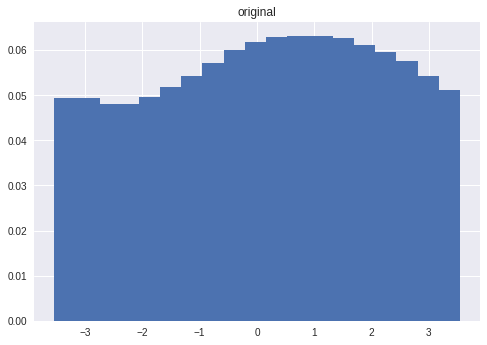

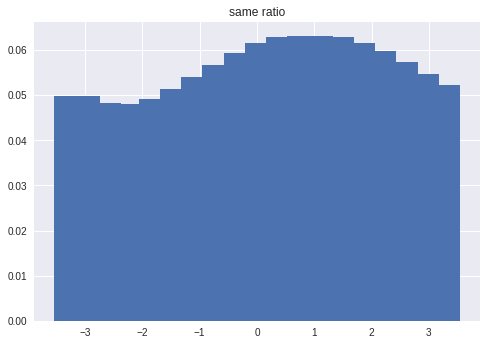

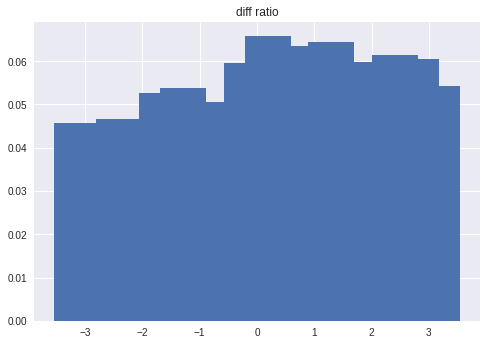

In [12]:
plt.bar(np.linspace(-np.pi, np.pi, n_bins), mean_bin_amp_original)
plt.title("original")
plt.show()
plt.bar(np.linspace(-np.pi, np.pi, n_bins), mean_bin_amp_same_ratio)
plt.title("same ratio")
plt.show()
plt.bar(np.linspace(-np.pi, np.pi, n_bins), mean_bin_amp_diff_ratio)
plt.title("diff ratio")
plt.show()

In [13]:
print("Histogram values for original\n",mean_bin_amp_original,"\nHistogram values for same ratio\n", mean_bin_amp_same_ratio,"\nHistogram values for different ratio\n", mean_bin_amp_diff_ratio)

Histogram values for original
 [0.04932545 0.04807413 0.0476591  0.04815312 0.04962222 0.05180918
 0.05416837 0.05718206 0.05997289 0.06180082 0.06282833 0.06311644
 0.06268075 0.06113118 0.05962845 0.05753644 0.05421289 0.0510982 ] 
Histogram values for same ratio
 [0.04984182 0.04827197 0.04766219 0.04792196 0.04915867 0.0513066
 0.05410956 0.0566951  0.05928977 0.06145313 0.06275309 0.06306965
 0.06275213 0.06162806 0.059798   0.0573483  0.05475164 0.05218836] 
Histogram values for different ratio
 [0.04579909 0.04541265 0.04669656 0.04649956 0.05276935 0.05390827
 0.05054888 0.05014531 0.05956934 0.06581608 0.06296302 0.06347932
 0.06441935 0.05993021 0.05567863 0.06154387 0.06047154 0.05434897]


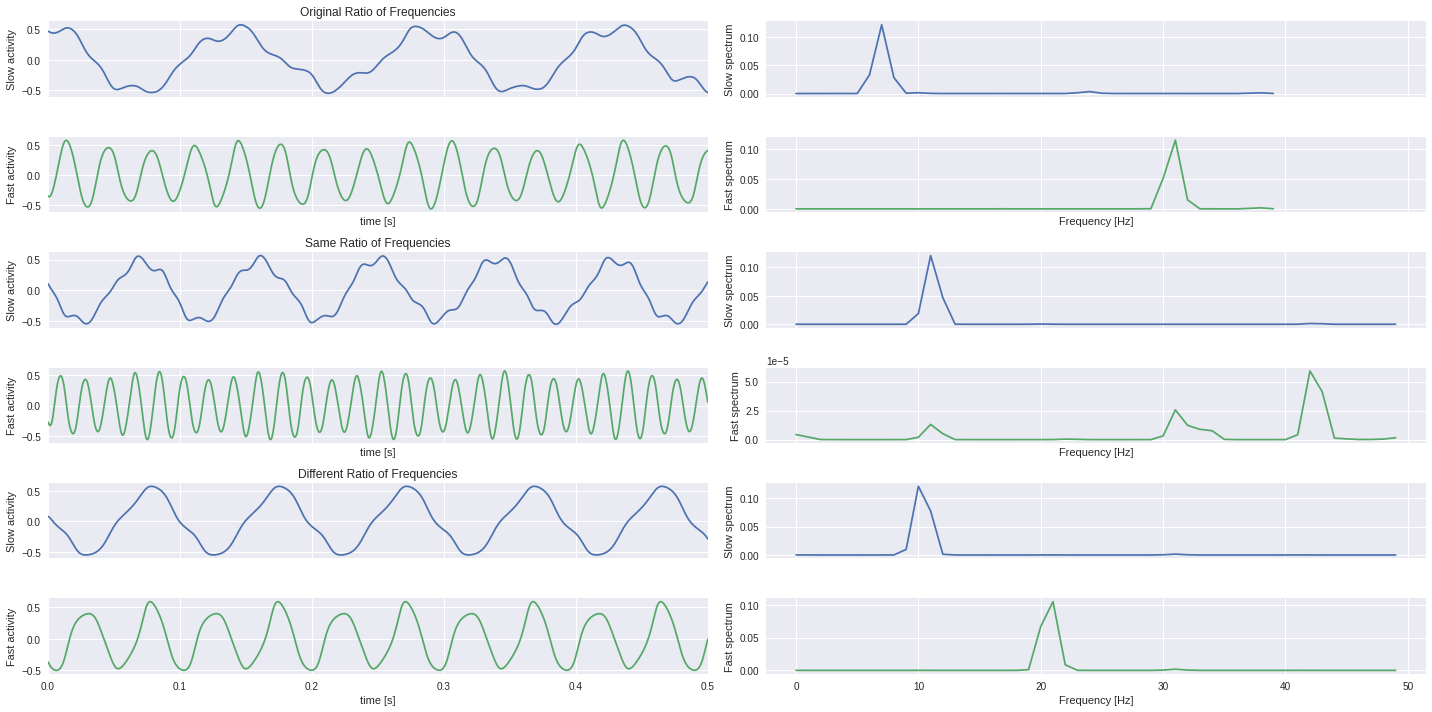

In [14]:
fig, axs = plt.subplots(nrows=6, ncols=2, sharex="col", figsize=(20, 10))

axs[0, 0].plot(model_original.t, model_original.x.T[:, 0])
axs[0, 0].set_ylabel("Slow activity")
axs[1, 0].plot(model_original.t, model_original.x.T[:, 1], color="C1")
axs[1, 0].set_ylabel("Fast activity")
axs[1, 0].set_xlabel("time [s]")
freq_slow_original, pow_slow_original = getPowerSpectrum(model_original.x.T[:, 0], dt=0.1, maxfr=40, spectrum_windowsize=1)
axs[0, 1].plot(freq_slow_original, pow_slow_original)
axs[0, 1].set_ylabel("Slow spectrum")
freq_fast_original, pow_fast_original = getPowerSpectrum(model_original.x.T[:, 1], dt=0.1, maxfr=40, spectrum_windowsize=1)
axs[1, 1].plot(freq_fast_original, pow_fast_original, color="C1")
axs[1, 1].set_ylabel("Fast spectrum")
axs[1, 1].set_xlabel("Frequency [Hz]")

axs[0, 0].set_xlim([0, 0.5])
axs[0, 0].set_title("Original Ratio of Frequencies")


axs[2, 0].plot(model_same_ratio.t, model_same_ratio.x.T[:, 0])
axs[2, 0].set_ylabel("Slow activity")
axs[3, 0].plot(model_same_ratio.t, model_same_ratio.x.T[:, 1], color="C1")
axs[3, 0].set_ylabel("Fast activity")
axs[3, 0].set_xlabel("time [s]")
freq_slow_same_ratio, pow_slow_same_ratio = getPowerSpectrum(model_same_ratio.x.T[:, 0], dt=0.1, maxfr=50, spectrum_windowsize=1)
axs[2, 1].plot(freq_slow_same_ratio, pow_slow_same_ratio)
axs[2, 1].set_ylabel("Slow spectrum")
freq_fast_same_ratio, pow_fast_same_ratio = getPowerSpectrum(model_same_ratio.x.T[:, 1], dt=0.1, maxfr=50, spectrum_windowsize=1)
axs[3, 1].plot(freq_fast_same_ratio, pow_fast_same_ratio, color="C1")
axs[3, 1].set_ylabel("Fast spectrum")
axs[3, 1].set_xlabel("Frequency [Hz]")

axs[2, 0].set_xlim([0, 0.5])
axs[2, 0].set_title("Same Ratio of Frequencies")

axs[4, 0].plot(model_diff_ratio.t, model_diff_ratio.x.T[:, 0])
axs[4, 0].set_ylabel("Slow activity")
axs[5, 0].plot(model_diff_ratio.t, model_diff_ratio.x.T[:, 1], color="C1")
axs[5, 0].set_ylabel("Fast activity")
axs[5, 0].set_xlabel("time [s]")
freq_slow_diff_ratio, pow_slow_diff_ratio = getPowerSpectrum(model_diff_ratio.x.T[:, 0], dt=0.1, maxfr=50, spectrum_windowsize=1)
axs[4, 1].plot(freq_slow_diff_ratio, pow_slow_diff_ratio)
axs[4, 1].set_ylabel("Slow spectrum")
freq_fast_diff_ratio, pow_fast_diff_ratio = getPowerSpectrum(model_diff_ratio.x.T[:, 1], dt=0.1, maxfr=50, spectrum_windowsize=1)
axs[5, 1].plot(freq_fast_diff_ratio, pow_fast_diff_ratio, color="C1")
axs[5, 1].set_ylabel("Fast spectrum")
axs[5, 1].set_xlabel("Frequency [Hz]")

axs[4, 0].set_xlim([0, 0.5])
axs[4, 0].set_title("Different Ratio of Frequencies")

fig.tight_layout()
plt.show()